<a href="https://colab.research.google.com/github/TurMod/Data-Science-HW/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN**

In [131]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.metrics import Precision, Recall, F1Score

In [132]:
max_features = 10000
maxlen = 500
batch_size = 32

In [133]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [134]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [135]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', Precision(), Recall(), F1Score()])

In [137]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
history = model.fit(input_train, y_train, epochs=4, batch_size=128, validation_split=0.3)

Epoch 1/4
137/137 [==============================] - 15s 102ms/step - loss: 0.6616 - acc: 0.5885 - precision_13: 0.5949 - recall_13: 0.5697 - f1_score: 0.6692 - val_loss: 0.5929 - val_acc: 0.7076 - val_precision_13: 0.6467 - val_recall_13: 0.8978 - val_f1_score: 0.6607
Epoch 2/4
137/137 [==============================] - 13s 97ms/step - loss: 0.4531 - acc: 0.8035 - precision_13: 0.8187 - recall_13: 0.7825 - f1_score: 0.6692 - val_loss: 0.4765 - val_acc: 0.7769 - val_precision_13: 0.7123 - val_recall_13: 0.9192 - val_f1_score: 0.6607
Epoch 3/4
137/137 [==============================] - 12s 89ms/step - loss: 0.3359 - acc: 0.8631 - precision_13: 0.8664 - recall_13: 0.8606 - f1_score: 0.6692 - val_loss: 0.3770 - val_acc: 0.8417 - val_precision_13: 0.8618 - val_recall_13: 0.8089 - val_f1_score: 0.6607
Epoch 4/4
137/137 [==============================] - 12s 90ms/step - loss: 0.2893 - acc: 0.8799 - precision_13: 0.8825 - recall_13: 0.8782 - f1_score: 0.6692 - val_loss: 0.3924 - val_acc: 0.84

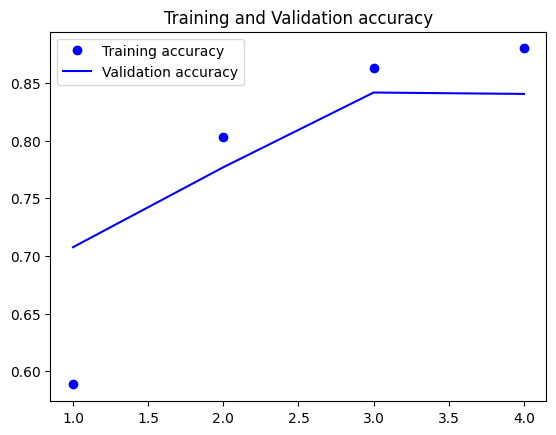

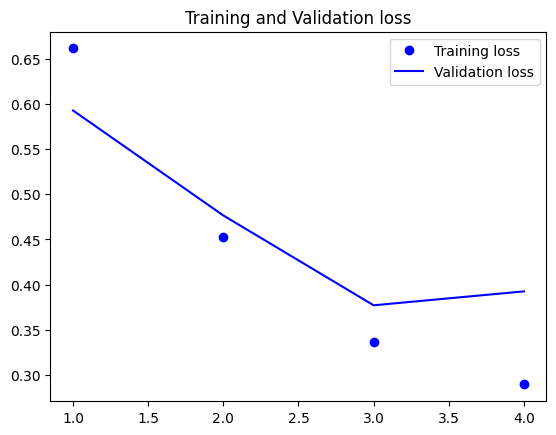

In [139]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [140]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, True: {y_test[i]}")

test_loss, test_acc, test_pre, test_rec, test_f1 = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test Presicion: {}'.format(test_pre))
print('Test Recall: {}'.format(test_rec))
print('Test F1Score: {}'.format(test_f1))

782/782 [==============================] - 11s 14ms/step
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 0, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 0.0
Predicted: 1, True: 1.0
782/782 [==============================] - 11s 15ms/step - loss: 0.3948 - acc: 0.8355 - precision_13: 0.8386 - recall_13: 0.8310 - f1_score: 0.6667
Test Loss: 0.39481332898139954
Test Accuracy: 0.8355200290679932
Test Presicion: 0.8386080861091614
Test Recall: 0.8309599757194519
Test F1Score: [0.6666667]


**LSTM**

In [141]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [142]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [143]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [144]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', Precision(), Recall(), F1Score()])

In [145]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [146]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 30s 206ms/step - loss: 0.6375 - acc: 0.6317 - precision_14: 0.6691 - recall_14: 0.5293 - f1_score: 0.6692 - val_loss: 0.5232 - val_acc: 0.7300 - val_precision_14: 0.9152 - val_recall_14: 0.4989 - val_f1_score: 0.6607
Epoch 2/5
137/137 [==============================] - 31s 229ms/step - loss: 0.4085 - acc: 0.8281 - precision_14: 0.8403 - recall_14: 0.8125 - f1_score: 0.6692 - val_loss: 0.3478 - val_acc: 0.8551 - val_precision_14: 0.9056 - val_recall_14: 0.7884 - val_f1_score: 0.6607
Epoch 3/5
137/137 [==============================] - 26s 189ms/step - loss: 0.2954 - acc: 0.8828 - precision_14: 0.8828 - recall_14: 0.8843 - f1_score: 0.6692 - val_loss: 0.3021 - val_acc: 0.8793 - val_precision_14: 0.8495 - val_recall_14: 0.9181 - val_f1_score: 0.6607
Epoch 4/5
137/137 [==============================] - 27s 196ms/step - loss: 0.2576 - acc: 0.9059 - precision_14: 0.9117 - recall_14: 0.9000 - f1_score: 0.6692 - val_loss: 0.3158 - val_acc: 0

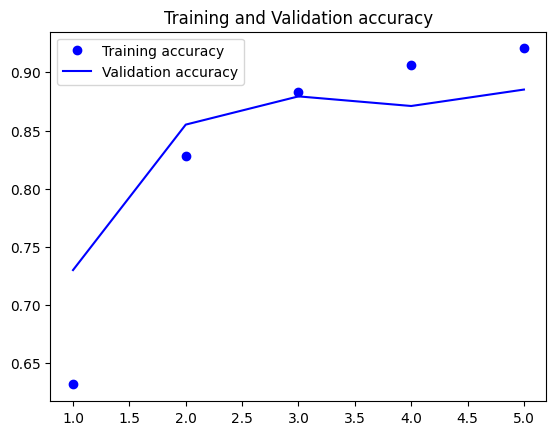

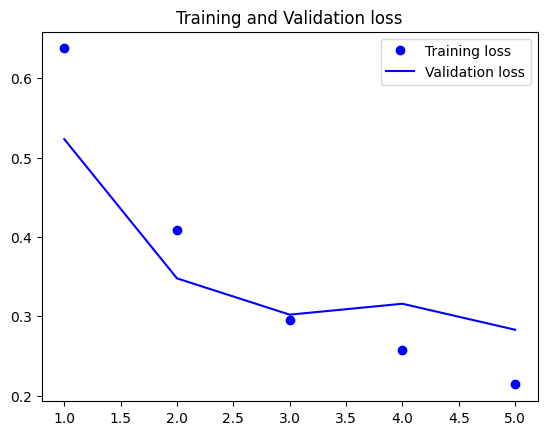

In [147]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [148]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, True: {y_test[i]}")

test_loss, test_acc, test_pre, test_rec, test_f1 = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test Presicion: {}'.format(test_pre))
print('Test Recall: {}'.format(test_rec))
print('Test F1Score: {}'.format(test_f1))

782/782 [==============================] - 20s 25ms/step
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 0.0
Predicted: 1, True: 1.0
782/782 [==============================] - 20s 25ms/step - loss: 0.2980 - acc: 0.8780 - precision_14: 0.8680 - recall_14: 0.8915 - f1_score: 0.6667
Test Loss: 0.297991544008255
Test Accuracy: 0.8779600262641907
Test Presicion: 0.8679803609848022
Test Recall: 0.8915200233459473
Test F1Score: [0.6666667]


**BRNN** (Двостороння)

In [155]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [156]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [157]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [158]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', Precision(), Recall(), F1Score()])

In [159]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 49s 337ms/step - loss: 0.6473 - acc: 0.6073 - precision_16: 0.6019 - recall_16: 0.6473 - f1_score: 0.6692 - val_loss: 0.5394 - val_acc: 0.7437 - val_precision_16: 0.8987 - val_recall_16: 0.5416 - val_f1_score: 0.6607
Epoch 2/5
137/137 [==============================] - 45s 330ms/step - loss: 0.4015 - acc: 0.8357 - precision_16: 0.8394 - recall_16: 0.8325 - f1_score: 0.6692 - val_loss: 0.3988 - val_acc: 0.8352 - val_precision_16: 0.8337 - val_recall_16: 0.8319 - val_f1_score: 0.6607
Epoch 3/5
137/137 [==============================] - 45s 326ms/step - loss: 0.2959 - acc: 0.8849 - precision_16: 0.8881 - recall_16: 0.8823 - f1_score: 0.6692 - val_loss: 0.3004 - val_acc: 0.8760 - val_precision_16: 0.8711 - val_recall_16: 0.8786 - val_f1_score: 0.6607
Epoch 4/5
137/137 [==============================] - 44s 325ms/step - loss: 0.2448 - acc: 0.9073 - precision_16: 0.9073 - recall_16: 0.9084 - f1_score: 0.6692 - val_loss: 0.3245 - val_acc: 0

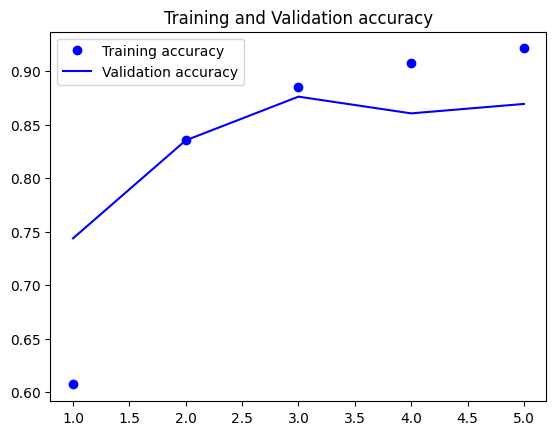

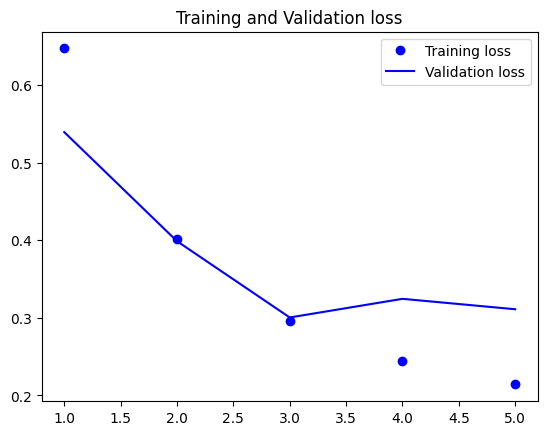

In [161]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [162]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, True: {y_test[i]}")

test_loss, test_acc, test_pre, test_rec, test_f1 = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test Presicion: {}'.format(test_pre))
print('Test Recall: {}'.format(test_rec))
print('Test F1Score: {}'.format(test_f1))

782/782 [==============================] - 34s 42ms/step
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 0.0
Predicted: 1, True: 1.0
782/782 [==============================] - 31s 39ms/step - loss: 0.3168 - acc: 0.8662 - precision_16: 0.8592 - recall_16: 0.8759 - f1_score: 0.6667
Test Loss: 0.3168238401412964
Test Accuracy: 0.8661999702453613
Test Presicion: 0.8592168092727661
Test Recall: 0.8759199976921082
Test F1Score: [0.6666667]


**DRNN** (глибока)

In [163]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [164]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

y_train = tf.cast(y_train, dtype=tf.float32)
y_test = tf.cast(y_test, tf.float32)

In [165]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [166]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', Precision(), Recall(), F1Score()])

In [167]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 117s 819ms/step - loss: 0.6701 - acc: 0.5647 - precision_17: 0.5508 - recall_17: 0.7291 - f1_score: 0.6692 - val_loss: 0.5273 - val_acc: 0.7428 - val_precision_17: 0.6892 - val_recall_17: 0.8719 - val_f1_score: 0.6607
Epoch 2/5
137/137 [==============================] - 110s 807ms/step - loss: 0.4105 - acc: 0.8204 - precision_17: 0.8212 - recall_17: 0.8217 - f1_score: 0.6692 - val_loss: 0.3205 - val_acc: 0.8701 - val_precision_17: 0.8678 - val_recall_17: 0.8692 - val_f1_score: 0.6607
Epoch 3/5
137/137 [==============================] - 110s 806ms/step - loss: 0.2849 - acc: 0.8869 - precision_17: 0.8853 - recall_17: 0.8905 - f1_score: 0.6692 - val_loss: 0.4848 - val_acc: 0.8169 - val_precision_17: 0.7381 - val_recall_17: 0.9749 - val_f1_score: 0.6607
Epoch 4/5
137/137 [==============================] - 110s 804ms/step - loss: 0.2355 - acc: 0.9088 - precision_17: 0.9072 - recall_17: 0.9119 - f1_score: 0.6692 - val_loss: 0.3060 - val_ac

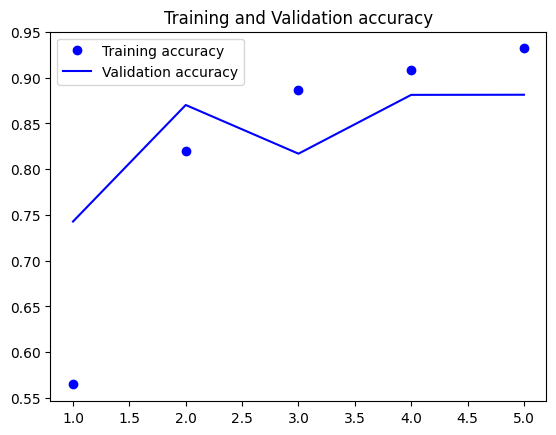

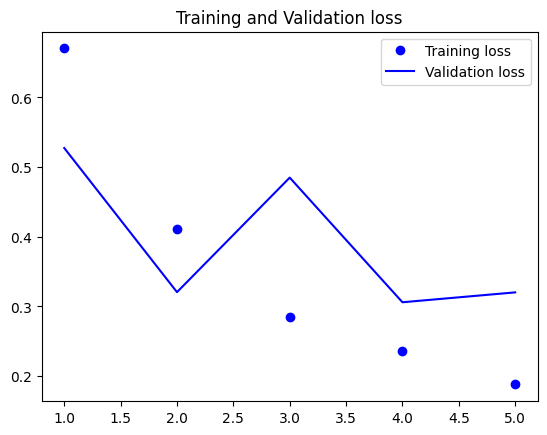

In [169]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [170]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Predicted: {binary_predictions[i]}, True: {y_test[i]}")

test_loss, test_acc, test_pre, test_rec, test_f1 = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))
print('Test Presicion: {}'.format(test_pre))
print('Test Recall: {}'.format(test_rec))
print('Test F1Score: {}'.format(test_f1))

782/782 [==============================] - 66s 83ms/step
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 1, True: 1.0
Predicted: 0, True: 0.0
Predicted: 1, True: 0.0
Predicted: 1, True: 1.0
782/782 [==============================] - 68s 87ms/step - loss: 0.3324 - acc: 0.8766 - precision_17: 0.8577 - recall_17: 0.9031 - f1_score: 0.6667
Test Loss: 0.3324229419231415
Test Accuracy: 0.8766400218009949
Test Presicion: 0.8576964139938354
Test Recall: 0.9031199812889099
Test F1Score: [0.6666667]


Самі кращі результати показала модель **DRNN**